بسم الله

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from tabulate import tabulate

# إعدادات العرض
sns.set(style='whitegrid', palette='muted', color_codes=True)

# النمذجة التنبؤية
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

# تثبيت العشوائية
import random
random.seed(42)
np.random.seed(42)

# مكتبة الإحصاء والتحذيرات
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
import matplotlib
matplotlib.use('Agg')  # Use Agg backend for matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# For predictive modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Set the plot style
sns.set(style='whitegrid')

In [2]:
df = pd.read_csv('/kaggle/input/xauusd-gold-price-historical-data-2004present/XAU_1d_data.csv')

In [3]:
# Preview data
print("Dataset preview:")
print(df.head())

Dataset preview:
                 Date;Open;High;Low;Close;Volume
0     2004.06.11 00:00;384;384.8;382.8;384.1;272
1  2004.06.14 00:00;384.3;385.8;381.8;382.8;1902
2  2004.06.15 00:00;382.8;388.8;381.1;388.6;1951
3  2004.06.16 00:00;387.1;389.8;382.6;383.8;2014
4    2004.06.17 00:00;383.6;389.3;383;387.6;1568


In [4]:
df.tail()


,Date;Open;High;Low;Close;Volume
5386,2025.06.02 00:00;3298.76;3382.86;3295.75;3380....
5387,2025.06.03 00:00;3383.51;3392.19;3333.08;3352....
5388,2025.06.04 00:00;3353.93;3384.64;3343.67;3372....
5389,2025.06.05 00:00;3373.34;3403.42;3339.43;3351....
5390,2025.06.06 00:00;3353.55;3369.26;3353;3368.94;...


In [5]:
df.shape


(5391, 1)

In [6]:
df.isnull().sum()


Date;Open;High;Low;Close;Volume    0
dtype: int64

In [7]:
df.duplicated().sum()


0

<Axes: >

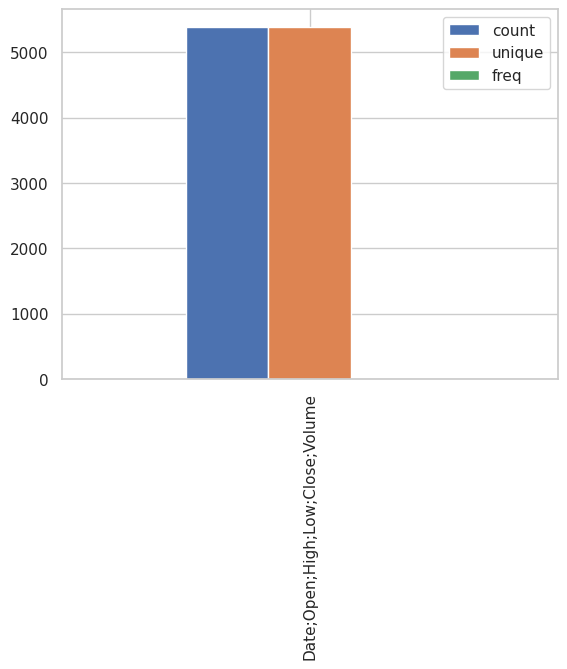

In [8]:
df.describe().T.plot(kind='bar')


In [9]:
numeric_cols = df.select_dtypes(include=['number']).columns

# رسم التوزيع لكل عمود رقمي
for col in numeric_cols:
    sns.histplot(x=col, data=df, kde=True)
    plt.show()

In [10]:
df

,Date;Open;High;Low;Close;Volume
0,2004.06.11 00:00;384;384.8;382.8;384.1;272
1,2004.06.14 00:00;384.3;385.8;381.8;382.8;1902
2,2004.06.15 00:00;382.8;388.8;381.1;388.6;1951
3,2004.06.16 00:00;387.1;389.8;382.6;383.8;2014
4,2004.06.17 00:00;383.6;389.3;383;387.6;1568
...,...
5386,2025.06.02 00:00;3298.76;3382.86;3295.75;3380....
5387,2025.06.03 00:00;3383.51;3392.19;3333.08;3352....
5388,2025.06.04 00:00;3353.93;3384.64;3343.67;3372....
5389,2025.06.05 00:00;3373.34;3403.42;3339.43;3351....
